In [68]:
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("files/hike_compilation.csv")
df.head()


,hike,date,time,altimeter,accuracy,altitude,time_h_m,corrected_altitude,elevation_gain
0,Blood Mountain,4/11/2018,11:58:29,GPS,Accurate,925.6,00:00,3036.7,0.0
1,Blood Mountain,4/11/2018,12:05:06,GPS,Accurate,935.4,00:06,3068.9,32.2
2,Blood Mountain,4/11/2018,12:08:24,GPS,Accurate,952.6,00:09,3125.3,88.6
3,Blood Mountain,4/11/2018,12:16:45,GPS,Accurate,1006.2,00:18,3301.2,264.4
4,Blood Mountain,4/11/2018,12:27:05,GPS,Accurate,1056.2,00:28,3465.2,428.5


Text(0,0.5,'Elevation Gain [ft]')

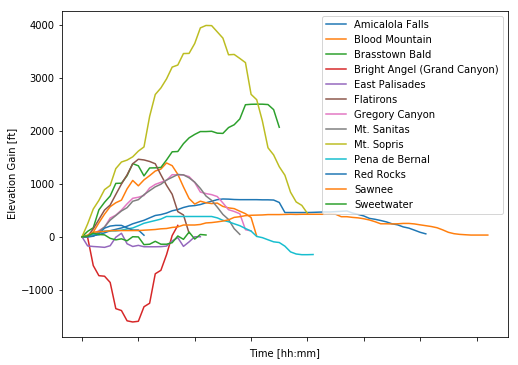

In [69]:
fig, ax = plt.subplots(figsize=(8,6))

for hikes, row in df.groupby('hike'):
    row.plot(x='time_h_m', y='elevation_gain', ax=ax, label=hikes)
plt.xlabel('Time [hh:mm]')
plt.ylabel('Elevation Gain [ft]')

In [84]:
df = df[['hike','time_h_m','elevation_gain']]
df.dropna(inplace=True)
df.reset_index(drop=True)
hikes = df['hike']
hikes_list = pd.unique(hikes)

i = 0
for trail in hikes_list:
    wide_df = df.loc[df['hike'] == trail]
    wide_df.loc[:, trail] = pd.Series(df['elevation_gain'])
    wide_df = wide_df.drop(columns=['elevation_gain','hike']).sort_values(by='time_h_m', ascending=True).reset_index(drop=True)
    
    if i == 0:
        gain_df = wide_df
        i += 1
    else:
        gain_df = pd.concat([gain_df, wide_df[[trail, 'time_h_m']]], axis=0, sort=True).reset_index(drop=True)

gain_df = gain_df.sort_values(by='time_h_m', ascending=True)
gain_df.iplot(x = 'time_h_m', kind='scatter', mode='markers', filename='hikes_graph', yTitle='Elevation Gain [ft]', 
              xTitle='Time [hh:mm]', title='Elevation gain per hike')